In [35]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('results pascal.csv')

In [53]:
methods = df["Attribution Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()
upscale_methods = df["Upscale Method"].unique()

In [54]:
df

,Image Index,Model,Attribution Method,Layer,Metric,Upscale Method,Value
0,-1,VGG11,_GradCAMPlusPlus,features.10,road_combined,SimpleUpsampling,0.111417
1,-1,VGG11,_GradCAMPlusPlus,features.10,road_combined,ERFUpsamplingFast,0.091568
2,-1,VGG11,_DeepLiftShap,features.10,road_combined,SimpleUpsampling,0.293908
3,-1,VGG11,_DeepLiftShap,features.10,road_combined,ERFUpsamplingFast,0.213869
4,-1,VGG11,_GradCAMPlusPlus,features.11,road_combined,SimpleUpsampling,0.045901
5,-1,VGG11,_GradCAMPlusPlus,features.11,road_combined,ERFUpsamplingFast,0.053437
6,-1,VGG11,_DeepLiftShap,features.11,road_combined,SimpleUpsampling,0.273678
7,-1,VGG11,_DeepLiftShap,features.11,road_combined,ERFUpsamplingFast,0.206722
8,-1,VGG11,_GradCAMPlusPlus,features.12,road_combined,SimpleUpsampling,0.100178
9,-1,VGG11,_GradCAMPlusPlus,features.12,road_combined,ERFUpsamplingFast,0.081317


In [38]:
import sys
sys.path.append('../')

from models import vgg11_PascalVOC
model = vgg11_PascalVOC()

layer_types = {}
types = []
for i, layer in enumerate(layers):
    layer_type = model.features[int(layer.split(".")[-1])].__class__.__name__
    layer_types[layer] = layer_type
    if layer_type not in types:
        types.append(layer_type)

print(types)
print(layer_types)

['MaxPool2d', 'Conv2d', 'ReLU']
{'features.10': 'MaxPool2d', 'features.11': 'Conv2d', 'features.12': 'ReLU', 'features.13': 'Conv2d', 'features.14': 'ReLU', 'features.15': 'MaxPool2d', 'features.16': 'Conv2d', 'features.17': 'ReLU', 'features.18': 'Conv2d', 'features.19': 'ReLU', 'features.20': 'MaxPool2d'}


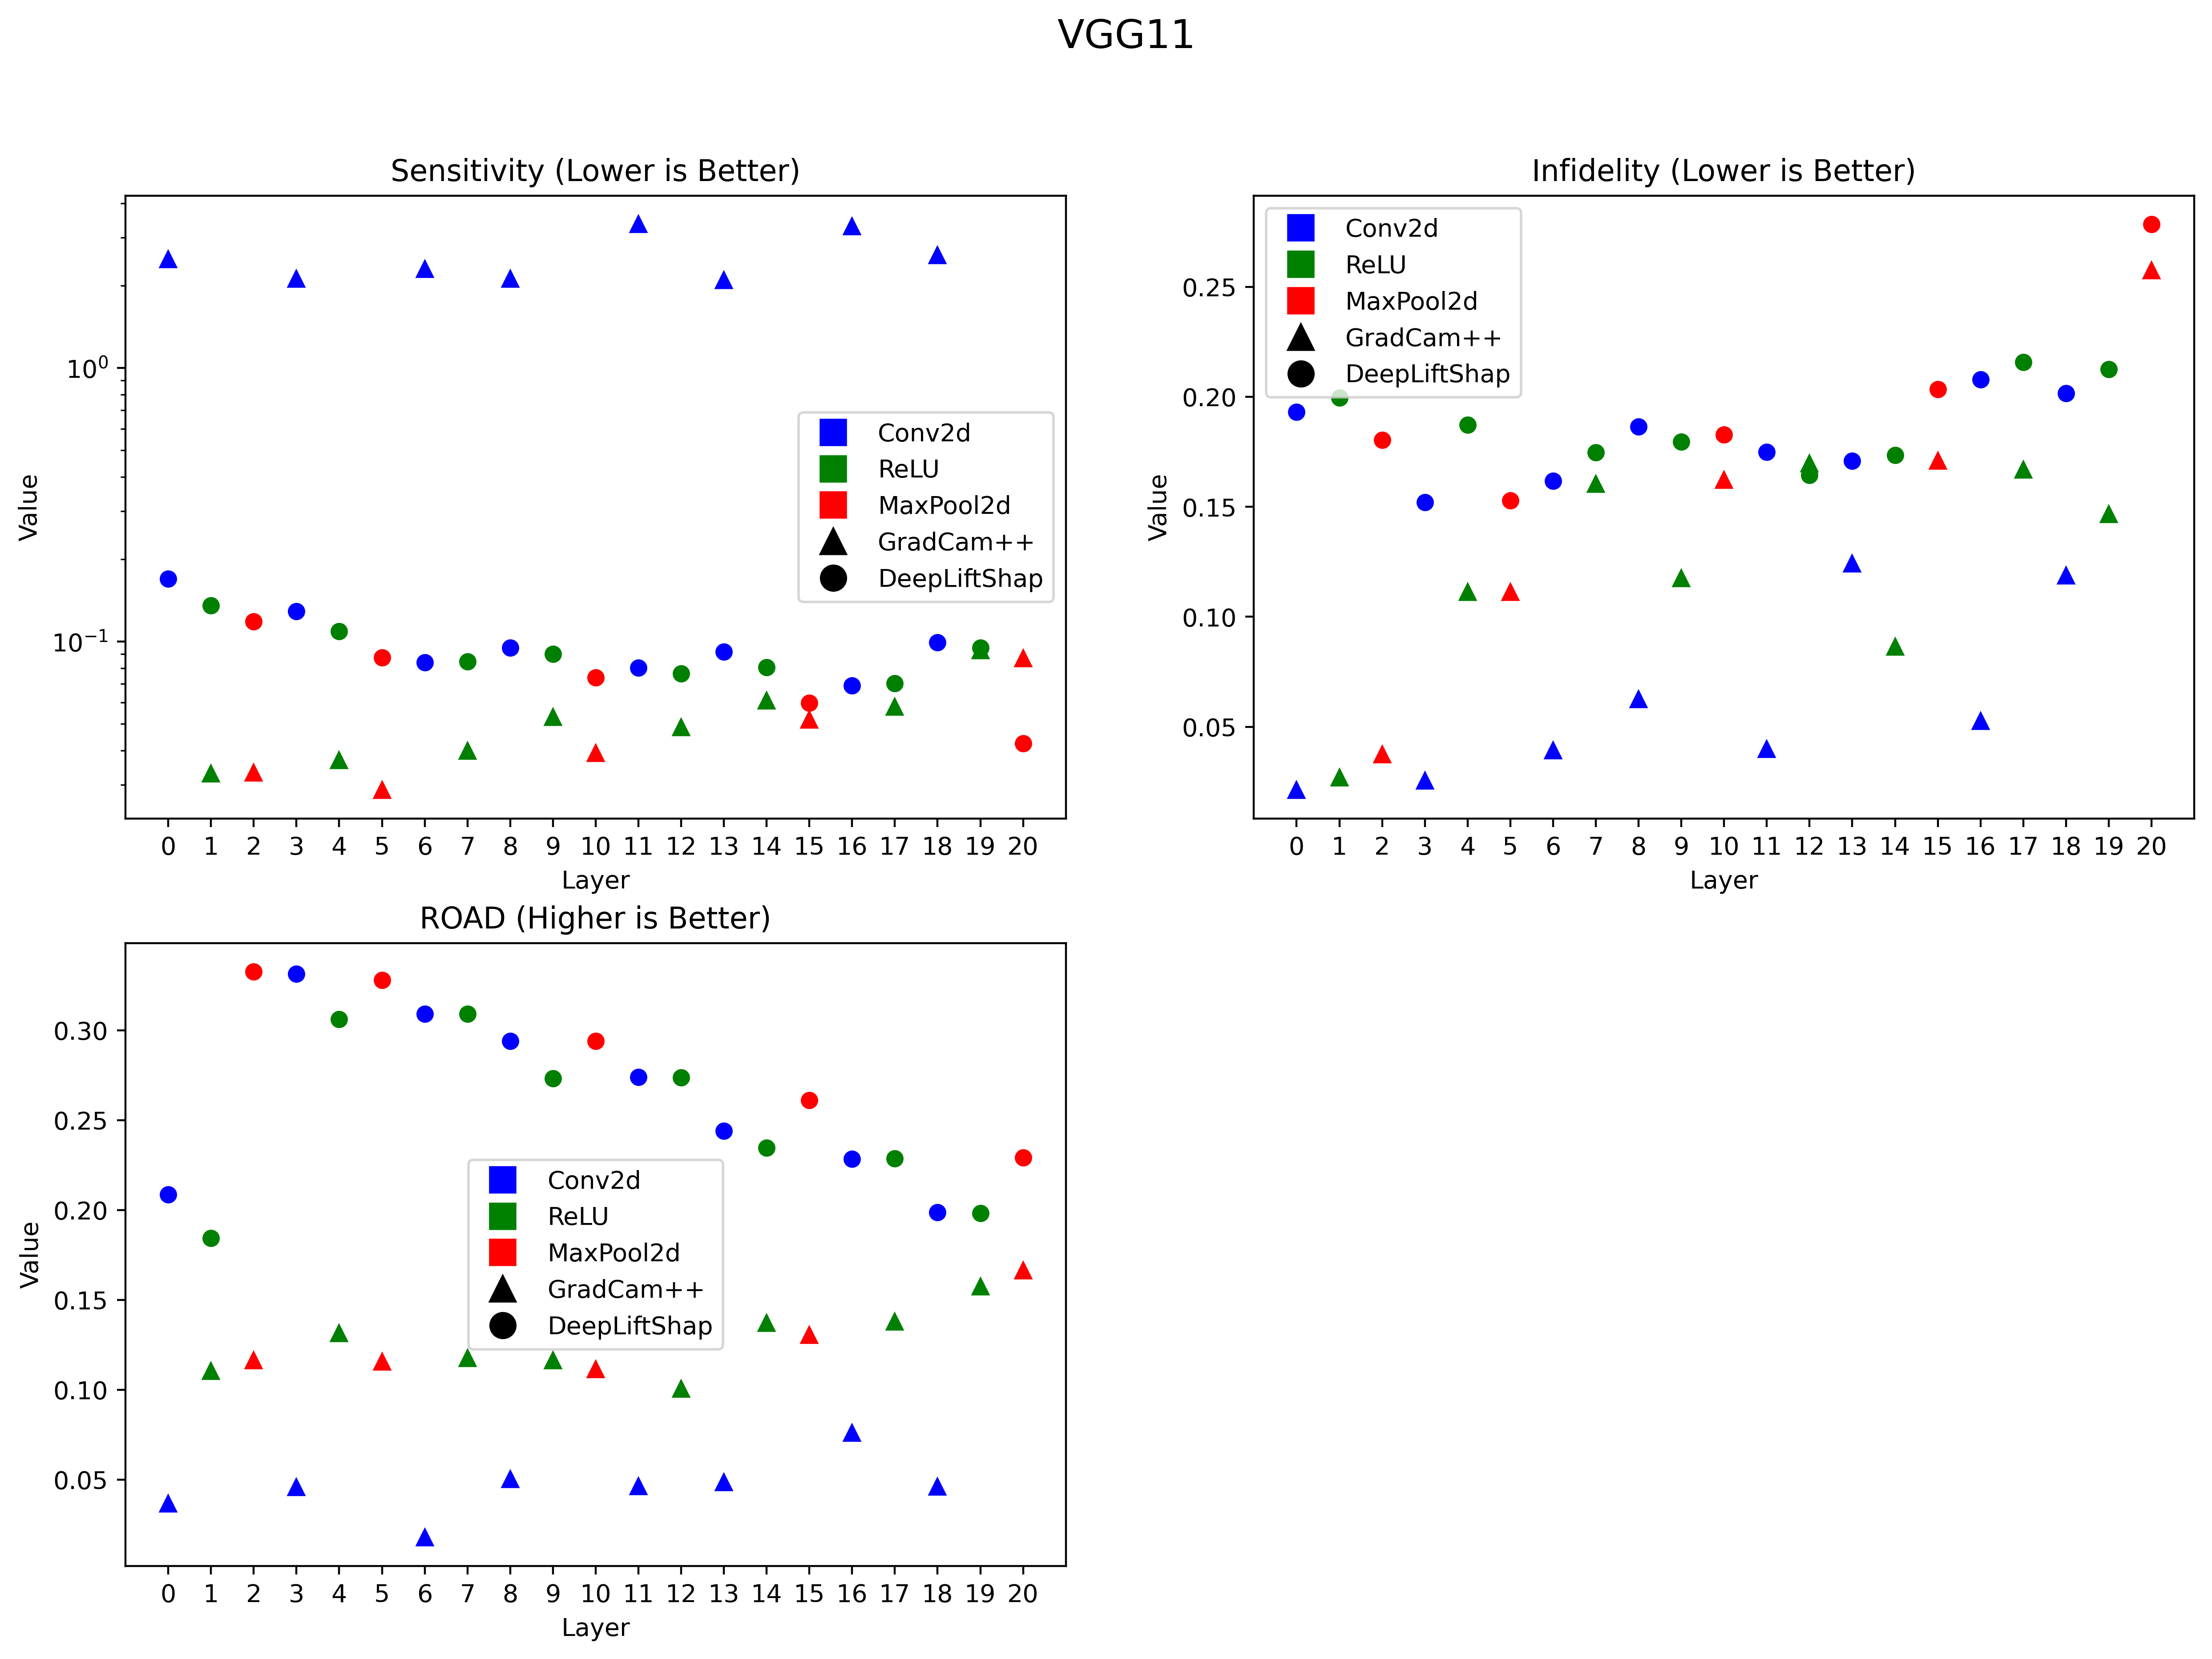

In [15]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
shape_for_methods = {"GradCam++": "^","DeepLiftShap": "o"}  # Define shape mapping
titles = {
    "sensitivity": "Sensitivity (Lower is Better)",
    "infidelity": "Infidelity (Lower is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

plt.figure(figsize=(15,10), dpi=400)
plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()


for index, metric in enumerate(metrics):
    plt.subplot(2, 2, index + 1)
    plt.title(titles[metric])
    for method in methods:
            for layer_type in types:
                res = df[(df["Attribution Method"] == method) & (df["Metric"] == metric) & (df["Layer"].apply(lambda x: layer_types[x] == layer_type))]
                indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in indices]

                plt.plot(indices, values,"o" if method == "_DeepLiftShap" else "^", label=layer_type, color=color_for_layers[types.index(layer_type)])
                plt.xlabel("Layer")
                plt.ylabel("Value")
                # Log scale for y
                if metric == "sensitivity":
                    plt.yscale("log")


    # Create color legend (Layer Types)
    color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
                    for color, layer in zip(color_for_layers, types)]

    # Create shape legend (Methods)
    shape_legend = [mlines.Line2D([], [], color='black', marker=shape, linestyle='None', markersize=10, label=method) 
                    for method, shape in shape_for_methods.items()]
    
    plt.xticks(range(len(layers)))
    plt.legend(handles=color_legend + shape_legend)

plt.savefig('results new.pdf', dpi=400, bbox_inches='tight')


In [16]:
df_erf = pd.read_csv('results erf.csv')
# Merge the two dataframes
df = pd.concat([df, df_erf])

upscale_methods = df["Upscale Method"].unique()
layers = df["Layer"].unique()
metrics = df["Metric"].unique()

In [52]:
upscale_methods

array(['SimpleUpsampling', 'ERFUpsampling'], dtype=object)

SimpleUpsampling
[0.111417145, 0.13039982, 0.16622849]
[0.29390755, 0.26102737, 0.22929567]
[0.04590117, 0.04857207, 0.076116614, 0.046295512]
[0.27367768, 0.24387684, 0.2285626, 0.19872247]
[0.10017793, 0.1371822, 0.13771996, 0.15750867]
[0.2738648, 0.2344805, 0.22871733, 0.19805819]
ERFUpsamplingFast
[0.09156848, 0.11568163, 0.113125674]
[0.21386927, 0.19966255, 0.14190903]
[0.05343746, -0.0042500356, 0.087424584, 0.05276883]
[0.20672196, 0.078891456, 0.16781285, 0.12197202]
[0.081317246, 0.110017344, 0.12624252, 0.108865246]
[0.1623384, 0.14423294, 0.17228214, 0.10815115]


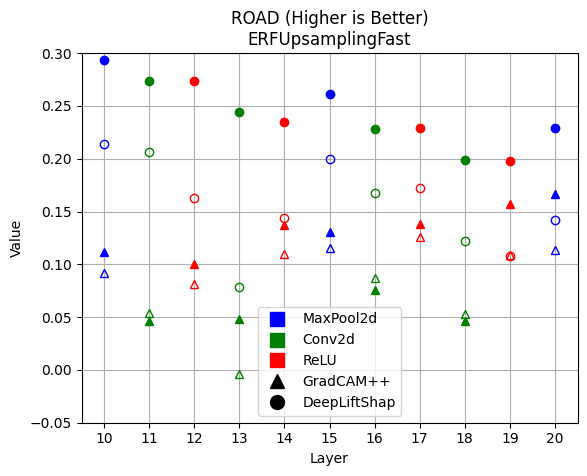

In [63]:
import matplotlib.lines as mlines


color_for_layers = ['b', 'g', 'r', 'c', 'm', 'y', 'k']
# shape_for_upscale = {"ERFUpsampling": "P","SimpleUpsampling": "D"}  # Define shape mapping
shape_for_methods = {"_GradCAMPlusPlus": "^","_DeepLiftShap": "o"}  # Define shape mapping

method_names = {"_GradCAMPlusPlus": "GradCAM++", "_DeepLiftShap": "DeepLiftShap"}  # Define shape mapping
# upscale_names = {"ERFUpsampling": "ERF Upsampling", "SimpleUpsampling": "Bilinear Upsampling"}  # Define shape mapping
titles = {
    "sensitivity": "Sensitivity (Lower is Better)",
    "infidelity": "Infidelity (Lower is Better)",
    "road_combined": "ROAD (Higher is Better)",
}

# fig = plt.figure(figsize=(10,10), dpi=400)


# fig.text(0.05, 0.75, 'GradCAM++', ha='center', va='center', fontsize=14) # , fontweight='bold')
# fig.text(0.05, 0.25, 'DeepLiftShap', ha='center', va='center', fontsize=14) # , fontweight='bold')

# plt.suptitle('VGG11', fontsize=16)
plt.tight_layout()

for index, upscale in enumerate(upscale_methods):
    print(upscale)
    # plt.subplot(1, 2, index + 1)
    plt.title(titles[metric] + f"\n{upscale}")
    for metric in metrics:
        for layer_type in types:
            for j, attr_method in enumerate(methods):
                res = df[(df["Upscale Method"] == upscale) &
                        (df["Metric"] == metric) &
                        (df["Layer"].apply(lambda x: layer_types[x] == layer_type)) &
                        (df["Attribution Method"] == attr_method)]
                # print(res)
                indices = res["Layer"].apply(lambda x: int(x.split(".")[-1]))
                # print(indices)
                indices = [i for i in indices if i >= 10]
                # values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in range(21)]
                values = [res[res["Layer"] == f"features.{l}"]["Value"].values[0] for l in indices]
                print(values)
                # print(shape_for_methods)
                # print(attr_method)
                # print(shape_for_methods[attr_method])
                if upscale == "SimpleUpsampling":
                    # print("SimpleUpsampling")
                    plt.plot(indices, values,shape_for_methods[attr_method], label=layer_type, color=color_for_layers[types.index(layer_type)])
                else:
                    # print("ERFUpsampling")
                    plt.plot(indices, values,shape_for_methods[attr_method],markerfacecolor= 'none', label=layer_type, color=color_for_layers[types.index(layer_type)])

                plt.xlabel("Layer")
                plt.ylabel("Value")
                # Log scale for y
                if metric == "sensitivity":
                    plt.yscale("log")

                plt.ylim([-0.05, 0.3])
                plt.grid(True)


    # Create color legend (Layer Types)
    color_legend = [mlines.Line2D([], [], color=color, marker='s', linestyle='None', markersize=10, label=layer) 
                    for color, layer in zip(color_for_layers, types)]

    # Create shape legend (Methods)
    shape_legend = [mlines.Line2D([], [], color='black', marker=shape, linestyle='None', markersize=10, label=method_names[upscale]) 
                    for upscale, shape in shape_for_methods.items()]
    
    plt.xticks(range(10,21))
    plt.legend(handles=color_legend + shape_legend)

plt.savefig('results erf.pdf', dpi=400, bbox_inches='tight')


In [65]:
L = [1,2,3,4,5]
for i in L[-1:]:
    print(i)

5
